In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

In [96]:
gold_sponsors = pd.read_csv('../../Datasets/Mastodon/mastodon_gold_sponsors.csv')

gold = gold_sponsors.loc[gold_sponsors['gp'] == 'g']
gold = gold_sponsors['Industry'].value_counts().to_frame()
gold = gold.rename_axis('Industry')
gold = gold.rename(columns={'Industry':'g'})

platinum = gold_sponsors.loc[gold_sponsors['gp'] == 'p']
platinum = platinum['Industry'].value_counts().to_frame()
platinum = platinum.rename_axis('Industry')
platinum = platinum.rename(columns={'Industry':'p'})

piv_gold_sponsors = gold.join(platinum).fillna(0).sort_values(by='p',ascending=False)
piv_gold_sponsors

,g,p
Industry,,
Media,4,4.0
IT,4,2.0
Software,4,2.0
Publishing,4,1.0
NSFW,3,1.0
Consulting,2,1.0
Marketing,1,1.0
Credit,1,0.0
Retail,1,0.0


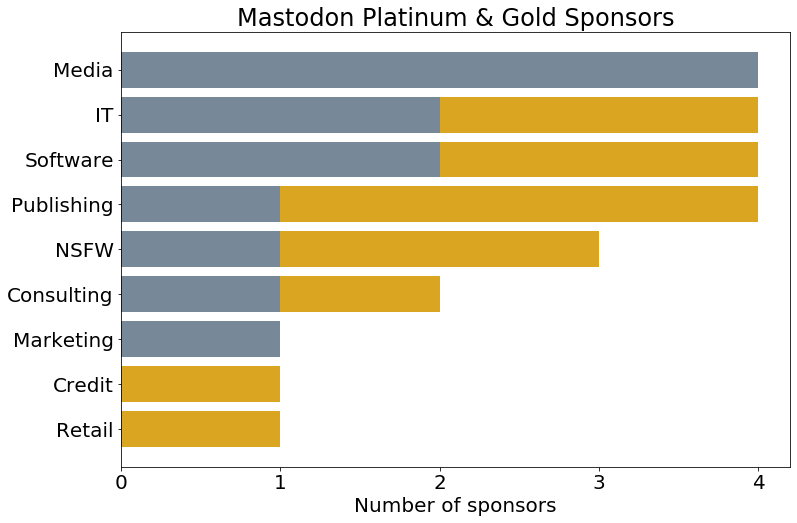

In [99]:
ind = ind.sort_values(by='Industry',ascending=False)
# ax = ind.plot.barh()
# ax.figure.savefig('industry2.jpg')

plt.rc('font', size=20)
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(piv_gold_sponsors.index,piv_gold_sponsors.g, align='center',color='goldenrod')
ax.barh(piv_gold_sponsors.index,piv_gold_sponsors.p, align='center',color='lightslategrey')


ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of sponsors')
ax.set_title('Mastodon Platinum & Gold Sponsors')
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels([0,1,2,3,4])

ax.figure.savefig('../../Figures/mastodon_pg_sponsors.jpg')
plt.show()

In [20]:
monthly_donations = 6380
total_patrons = 752

patrons = pd.read_csv('../../Datasets/Mastodon/mastodon_patreon.csv')
patrons.at[0,'count'] = total_patrons - patrons['count'].sum() #calc number of 'Every dollar counts' patrons
patrons['count'] = patrons['count'].astype(int) #cast to int

# add column of min donations from each donation level
patrons['total_donations'] = patrons['min_donation'].multiply(patrons['count'])

donations_lb = patrons['total_donations'].sum()
print('total donations per month (lower bound):',donations_lb,sep=' ')

patrons.head(6)

total donations per month (lower bound): 6341


,Donation level,min_donation,benefits,count,total_donations
0,Every dollar counts,1,Access to development Discord,601,601
1,Sponsors,10,"Your name on the sponsors list, as well as pre...",88,880
2,Highlighted sponsors,20,Listed at the top of the general sponsors list...,15,300
3,Silver sponsors,40,Your name and link along with a small avatar o...,24,960
4,Gold sponsors,100,Your medium-sized logo as a link at the very t...,12,1200
5,Platinum sponsors,200,Your medium-sized logo as a link on the projec...,12,2400


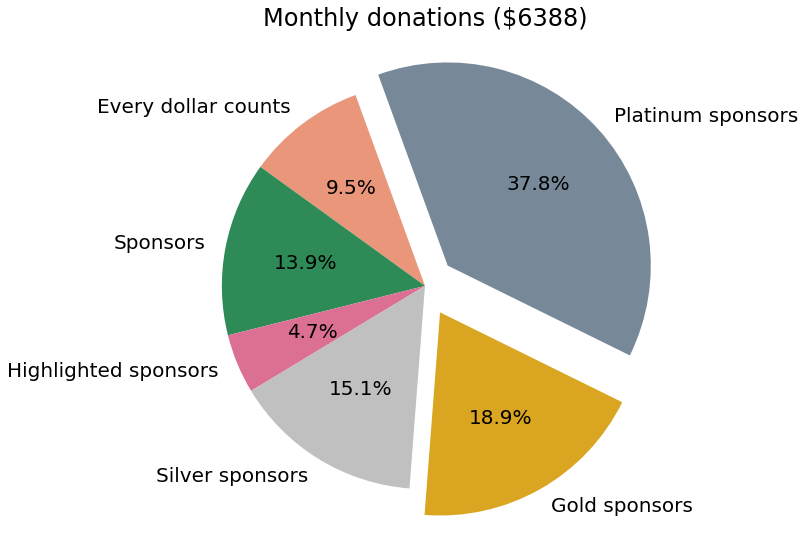

In [30]:
# pie chart parameters
fig, ax = plt.subplots(figsize=(12, 8))
ratios = list(patrons['total_donations'])
labels = list(patrons['Donation level'])
explode = [0, 0, 0, 0, 0.15, 0.15]
colors = ['darksalmon','seagreen','palevioletred','silver','goldenrod','lightslategrey']
# rotate so that first wedge is split by the x-axis
angle = 110
ax.pie(ratios, autopct='%1.1f%%', startangle=angle, labels=labels, explode=explode,colors=colors)
ax.set_title('Monthly donations ($6388)')
ax.figure.savefig('../../Figures/mastodon_sponsors.png', transparent=True)
plt.tight_layout()
plt.show()

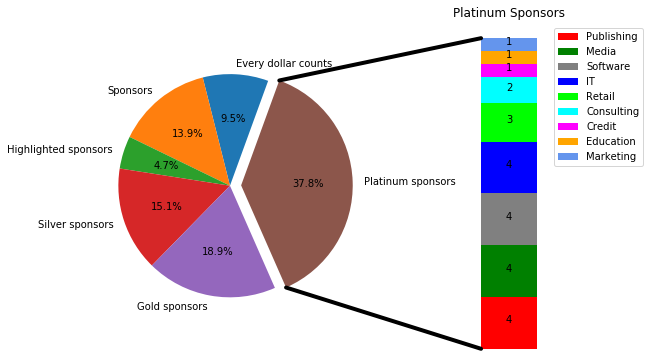

In [7]:
# make figure and assign axis objects
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = list(patrons['total_donations'])
labels = list(patrons['Donation level'])
explode = [0, 0, 0, 0, 0, 0.1]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[5] + 70
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

# ax2.barh(ind.index,ind.industry, align='center')
# # ax2.invert_yaxis()  # labels read top-to-bottom
# ax2.set_xlabel('Number of sponsors')

# bar chart parameters

xpos = 0
bottom = 0
ratios = ind.values
width = .2
colors = ['red', 'green', 'grey', 'blue', 'lime', 'cyan', 'magenta', 'orange', 'cornflowerblue']
# [[.1, .3, 0], [.1, .3, .1], [.1, .3, .2], [.1, .3, .3],[.1, .3, .4], [.1, .3, .4], [.1, .3, .5], [.1, .3, .6], [.1, .3, .7], [.1, .3, .8]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d" % (ratios[j]),
             ha='center')

ax2.set_title('Platinum Sponsors')
ax2.legend(ind.index)
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[5].theta1, ax1.patches[5].theta2
center, r = ax1.patches[5].center, ax1.patches[5].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(- width / 2, bar_height), xyB=(x, y),
                      coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(- width / 2, 0), xyB=(x, y), coordsA="data",
                      coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()